# 1) How can you use Python to handle imbalanced datasets for classification tasks?

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

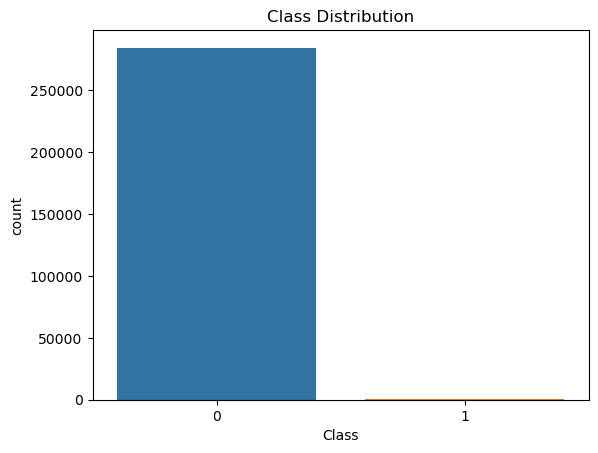


Training class distribution: [199008    356]
Testing class distribution: [85307   136]

Resampled training class distribution: [199008 199008]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

print(df.head())
print("\nClass Distribution:\n", df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTraining class distribution:", np.bincount(y_train))
print("Testing class distribution:", np.bincount(y_test))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nResampled training class distribution:", np.bincount(y_train_resampled))

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 2) How do you choose the optimal number of clusters for K-means in Python?

C:\Users\goutham\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\goutham\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\goutham\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\goutham\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

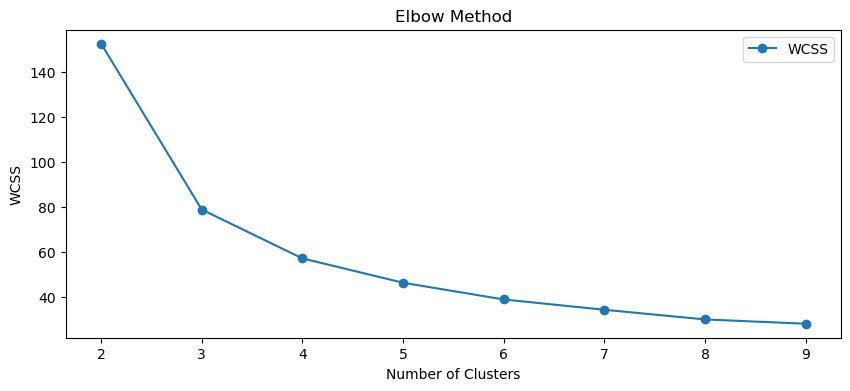

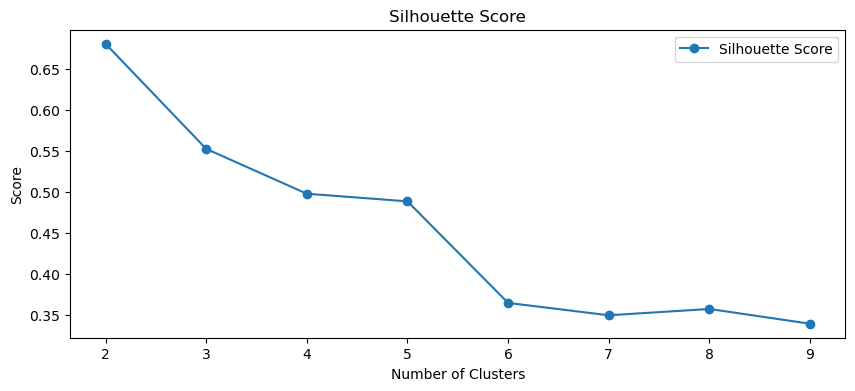

In [3]:
import os
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

os.environ["OMP_NUM_THREADS"] = "1"


iris = load_iris()
X = iris.data


wcss = [] 
silhouette_scores = []


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))  

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), wcss, marker='o', label='WCSS')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o', label='Silhouette Score')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.show()


# 3) What techniques can you use to reduce dimensionality for large datasets (e.g., PCA)?

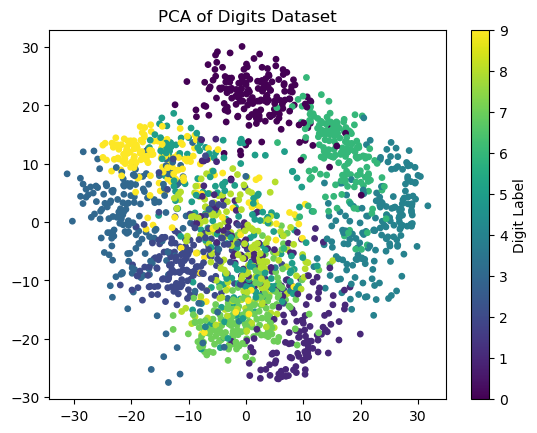

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='viridis', s=15)
plt.colorbar(label='Digit Label')
plt.title("PCA of Digits Dataset")
plt.show()


# 4) How do you use Python to find and visualize correlations in a big dataset?

Correlation Matrix:
            Feature_A  Feature_B  Feature_C  Feature_D
Feature_A   1.000000   0.979291  -0.942010  -0.211882
Feature_B   0.979291   1.000000  -0.909817  -0.190558
Feature_C  -0.942010  -0.909817   1.000000   0.186146
Feature_D  -0.211882  -0.190558   0.186146   1.000000


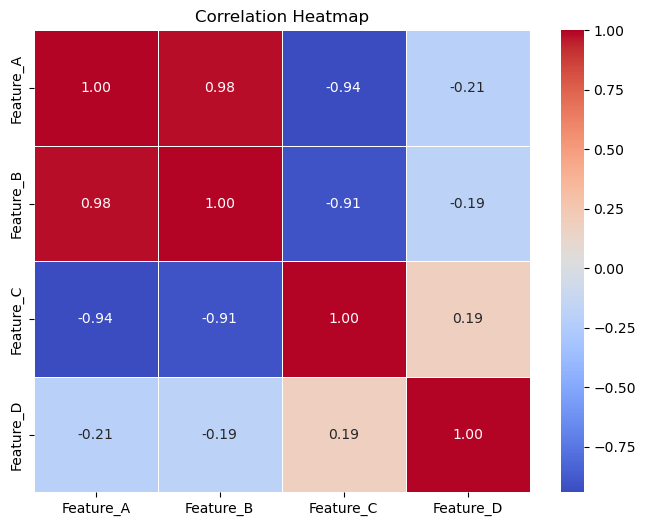

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
data = {
    'Feature_A': np.random.rand(100),
    'Feature_B': np.random.rand(100) * 2,
    'Feature_C': np.random.rand(100) * 3,
    'Feature_D': np.random.rand(100) * 4
}
df = pd.DataFrame(data)

df['Feature_B'] = df['Feature_A'] * 1.5 + np.random.normal(0, 0.1, 100)
df['Feature_C'] = df['Feature_A'] * -2 + np.random.normal(0, 0.2, 100)

corr_matrix = df.corr()

print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# 5) How can you handle missing values in a dataset using Python?

In [6]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, np.nan, 35, 40, np.nan],
    'Salary': [50000, 60000, np.nan, 80000, 75000],
    'City': ['New York', 'Los Angeles', np.nan, 'Chicago', 'New York']
}
df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

print("\nMissing Value Count:")
print(df.isnull().sum())

df_dropped = df.dropna()
print("\nDataset after Dropping Rows with Missing Values:")
print(df_dropped)

df_filled_mean = df.fillna({'Age': df['Age'].mean(), 'Salary': df['Salary'].mean(), 'City': 'Unknown'})
print("\nDataset after Filling Missing Values with Mean for Numerical Columns and 'Unknown' for Categorical:")
print(df_filled_mean)

df_ffill = df.fillna(method='ffill')
print("\nDataset after Forward Fill:")
print(df_ffill)

df_bfill = df.fillna(method='bfill')
print("\nDataset after Backward Fill:")
print(df_bfill)

df_interpolated = df.copy()
df_interpolated['Age'] = df_interpolated['Age'].interpolate(method='linear')
df_interpolated['Salary'] = df_interpolated['Salary'].interpolate(method='linear')
print("\nDataset after Interpolation for Numerical Columns:")
print(df_interpolated)


Original Dataset:
      Name   Age   Salary         City
0    Alice  25.0  50000.0     New York
1      Bob   NaN  60000.0  Los Angeles
2  Charlie  35.0      NaN          NaN
3    David  40.0  80000.0      Chicago
4      Eve   NaN  75000.0     New York

Missing Value Count:
Name      0
Age       2
Salary    1
City      1
dtype: int64

Dataset after Dropping Rows with Missing Values:
    Name   Age   Salary      City
0  Alice  25.0  50000.0  New York
3  David  40.0  80000.0   Chicago

Dataset after Filling Missing Values with Mean for Numerical Columns and 'Unknown' for Categorical:
      Name        Age   Salary         City
0    Alice  25.000000  50000.0     New York
1      Bob  33.333333  60000.0  Los Angeles
2  Charlie  35.000000  66250.0      Unknown
3    David  40.000000  80000.0      Chicago
4      Eve  33.333333  75000.0     New York

Dataset after Forward Fill:
      Name   Age   Salary         City
0    Alice  25.0  50000.0     New York
1      Bob  25.0  60000.0  Los Angeles
2 

# 6) How can you detect and remove duplicate entries in a big dataset?

In [7]:
import pandas as pd

data2 = {
    'Product': ['Laptop', 'Tablet', 'Smartphone', 'Laptop', 'Smartwatch', 'Smartphone'],
    'Price': [1200, 300, 800, 1200, 200, 800],
    'Brand': ['Apple', 'Samsung', 'Samsung', 'Apple', 'Fitbit', 'Samsung'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Wearable', 'Electronics']
}

df2 = pd.DataFrame(data2)

print("Original Dataset:")
print(df2)

duplicates = df2.duplicated()
print("\nDuplicate Rows (True means duplicate):")
print(duplicates)

df2_no_duplicates = df2.drop_duplicates()
print("\nDataset after Removing Duplicates (Keep First):")
print(df2_no_duplicates)

df2_no_duplicates_columns = df2.drop_duplicates(subset=['Product', 'Brand'])
print("\nDataset after Removing Duplicates (Based on 'Product' and 'Brand'):")
print(df2_no_duplicates_columns)

df2_no_duplicates_none = df2[df2.duplicated(keep=False) == False]
print("\nDataset after Removing All Duplicate Rows (Keep None):")
print(df2_no_duplicates_none)


Original Dataset:
      Product  Price    Brand     Category
0      Laptop   1200    Apple  Electronics
1      Tablet    300  Samsung  Electronics
2  Smartphone    800  Samsung  Electronics
3      Laptop   1200    Apple  Electronics
4  Smartwatch    200   Fitbit     Wearable
5  Smartphone    800  Samsung  Electronics

Duplicate Rows (True means duplicate):
0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool

Dataset after Removing Duplicates (Keep First):
      Product  Price    Brand     Category
0      Laptop   1200    Apple  Electronics
1      Tablet    300  Samsung  Electronics
2  Smartphone    800  Samsung  Electronics
4  Smartwatch    200   Fitbit     Wearable

Dataset after Removing Duplicates (Based on 'Product' and 'Brand'):
      Product  Price    Brand     Category
0      Laptop   1200    Apple  Electronics
1      Tablet    300  Samsung  Electronics
2  Smartphone    800  Samsung  Electronics
4  Smartwatch    200   Fitbit     Wearable

Dataset after 

# 7) How can you implement and tune a Random Forest Regression model for housing price prediction?

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

data = pd.read_csv('housing.csv')  


data = data.dropna()  


data = pd.get_dummies(data, drop_first=True)

X = data.drop(['median_house_value'], axis=1)  
y = data['median_house_value']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

print(f"Initial model R^2 score: {forest.score(X_test, y_test):.4f}")

param_grid = {
    "n_estimators": [100, 200, 300],  
    "max_features": [6, 8, 10],        
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

best_forest_model = grid_search.best_estimator_

print(f"Best model R^2 score: {best_forest_model.score(X_test, y_test):.4f}")

print(f"Best hyperparameters from GridSearchCV: {grid_search.best_params_}")


Initial model R^2 score: 0.8261


# 8) Plot the histogram,bar chart and pie chart on a sample data set

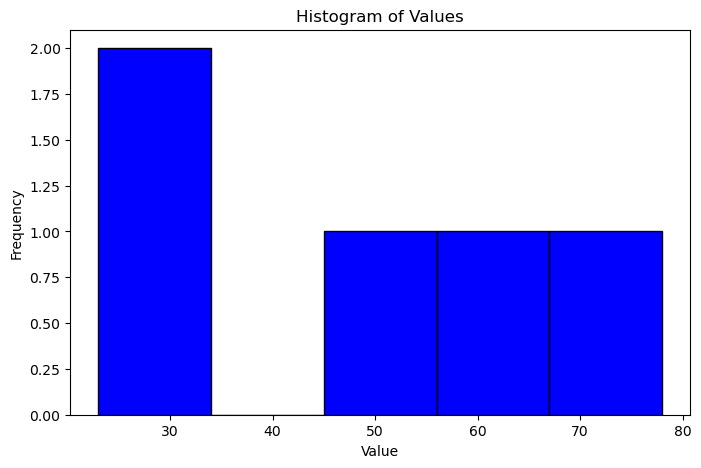

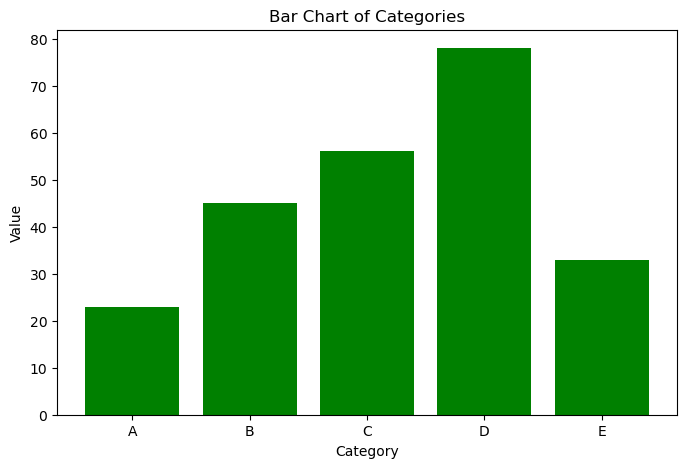

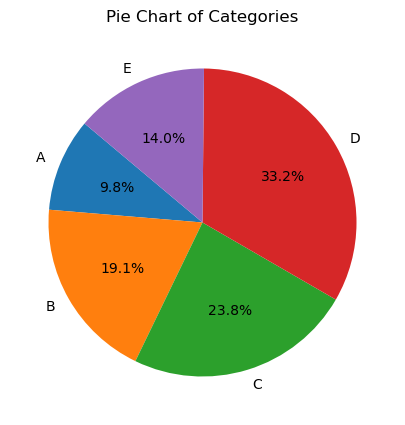

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = {
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value': [23, 45, 56, 78, 33]
}

df = pd.DataFrame(data)

# 1) Plot a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Value'], bins=5, color='blue', edgecolor='black')
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 2) Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(df['Category'], df['Value'], color='green')
plt.title('Bar Chart of Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

# 3) Plot a pie chart
plt.figure(figsize=(8, 5))
plt.pie(df['Value'], labels=df['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categories')
plt.show()


# 9) Implement Linear and logistic Regression on a sample dataset

Linear Regression Mean Squared Error: 768.4638


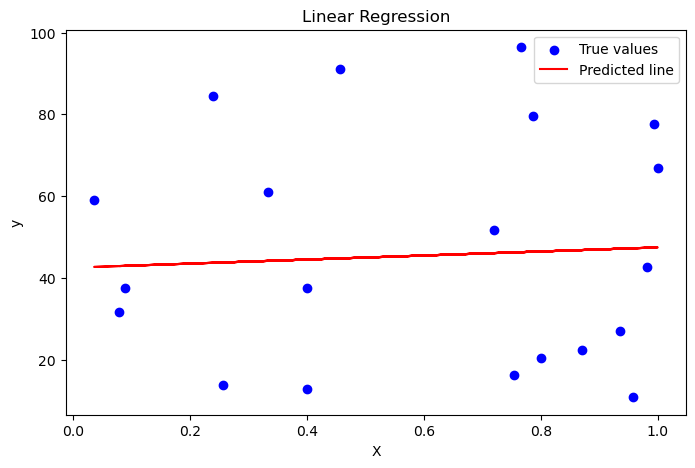

Logistic Regression Accuracy: 0.4500


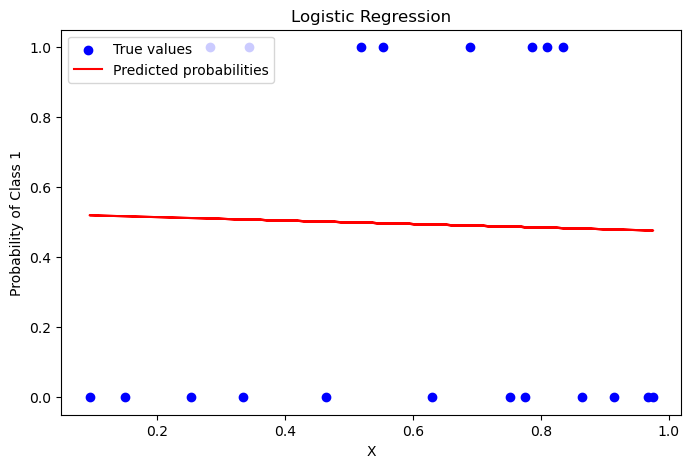

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt


linear_data = {
    'X': np.random.rand(100),  
    'y': np.random.rand(100) * 100  
}
df_linear = pd.DataFrame(linear_data)

X_linear = df_linear[['X']]  
y_linear = df_linear['y']    

X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred_linear, color='red', label='Predicted line')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


logistic_data = {
    'X': np.random.rand(100),  
    'y': np.random.choice([0, 1], size=100)  
}
df_logistic = pd.DataFrame(logistic_data)

X_logistic = df_logistic[['X']]
y_logistic = df_logistic['y']    

X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

y_pred_logistic = logistic_model.predict(X_test_logistic)

accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(X_test_logistic, y_test_logistic, color='blue', label='True values')
plt.plot(X_test_logistic, logistic_model.predict_proba(X_test_logistic)[:, 1], color='red', label='Predicted probabilities')
plt.title('Logistic Regression')
plt.xlabel('X')
plt.ylabel('Probability of Class 1')
plt.legend()
plt.show()


# 10)How do you use Python to create lag features for time-series datasets.

In [5]:
import pandas as pd
import numpy as np

data = {
    'Date': pd.date_range(start='2025-01-01', periods=10, freq='D'),
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]  
}

df = pd.DataFrame(data)

df.set_index('Date', inplace=True)

df['Lag_1'] = df['Value'].shift(1)  
df['Lag_2'] = df['Value'].shift(2)  


df.fillna(0, inplace=True)  

print(df)


            Value  Lag_1  Lag_2
Date                           
2025-01-01     10    0.0    0.0
2025-01-02     15   10.0    0.0
2025-01-03     20   15.0   10.0
2025-01-04     25   20.0   15.0
2025-01-05     30   25.0   20.0
2025-01-06     35   30.0   25.0
2025-01-07     40   35.0   30.0
2025-01-08     45   40.0   35.0
2025-01-09     50   45.0   40.0
2025-01-10     55   50.0   45.0
